# Azure and SQL Demo: Enhanced Data Pipeline for Sales Analysis

## Project Overview:

This enhanced project demonstrates a robust data pipeline using local file handling to emulate Azure Blob Storage and SQLite to emulate Azure SQL Database. We use a sales dataset to simulate upload/download, perform advanced data cleaning, execute complex SQL queries, integrate basic machine learning, and visualize insights. New features include advanced SQL operations (joins, window functions, CTEs, stored procedures), data validation, and recommendations for real Azure integration.

## Dataset:
Sample Sales Data CSV from Kaggle "sales_data.csv".

## Dataset Description:
- Columns: ORDERNUMBER, QUANTITYORDERED, PRICEEACH, SALES, ORDERDATE, STATUS, PRODUCTLINE, CITY, STATE, COUNTRY, etc.
- Use: Analyze sales trends, top products, regional performance, and customer segmentation.

In [1]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# local file paths for this emulation via google colab
local_file = "/content/sales_data.csv"
emulated_blob_path = "/content/emulated_sales_data.csv"

In [3]:
# Install required libraries
!pip install pandas matplotlib seaborn plotly faker
# Note: azure-storage-blob and pyodbc are excluded for Colab compatibility; use in real Azure setup
# sqlite3 is included in Python standard library
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from faker import Faker
import uuid
import logging

# Set up logging for pipeline monitoring
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [4]:
# Local file paths for emulation in Colab
local_file = "/content/sales_data.csv"
emulated_blob_path = "/content/emulated_sales_data.csv"
database_path = "/content/sales_db.sqlite"

# Generate synthetic customer data for joins
faker = Faker()
customers = pd.DataFrame({
    'CustomerID': [str(uuid.uuid4()) for _ in range(100)],
    'CustomerName': [faker.company() for _ in range(100)],
    'LoyaltyLevel': [faker.random_element(['Bronze', 'Silver', 'Gold']) for _ in range(100)]
})
customers.to_csv('/content/customers.csv', index=False)

In [5]:
import pandas as pd
import os
import logging # Import logging here as well

# Set up logging for pipeline monitoring
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__) # Define logger here

local_file = "/content/sales_data.csv" # Redefine local_file just in case
emulated_blob_path = "/content/emulated_sales_data.csv" # Redefine emulated_blob_path

try:
    # Check if the input file exists
    if not os.path.exists(local_file):
        logger.error(f"Error: The file {local_file} was not found. Please ensure it is uploaded to the correct path.")
        raise FileNotFoundError(f"The file {local_file} was not found.")

    # Read input file
    # Using latin-1 encoding as identified in previous attempts to handle potential character issues
    df = pd.read_csv(local_file, encoding='latin-1')

    # --- Data Validation (Pandas-based) ---
    # Methodology: Using simple pandas checks for critical data quality issues.
    # This approach is chosen for its simplicity and directness, avoiding external library complexities
    # for basic validation requirements like checking for missing values and data types.

    # Check for nulls in the critical 'ORDERNUMBER' column
    if df['ORDERNUMBER'].isnull().any():
        logger.error("Data validation failed: Missing values in ORDERNUMBER column.")
        # Optionally, you could handle this by dropping rows or raising an error
        raise ValueError("Data validation failed: Missing values found in critical column.")

    # Check if the 'SALES' column is numeric (float or int)
    # Using pd.api.types.is_numeric_dtype for a robust check
    if not pd.api.types.is_numeric_dtype(df['SALES']):
         logger.error("Data validation failed: SALES column is not numeric.")
         # Attempt to convert, or raise an error if conversion is not desired
         try:
             df['SALES'] = pd.to_numeric(df['SALES'])
             logger.warning("Attempted to convert SALES column to numeric.")
         except ValueError:
             logger.error("Data validation failed: Could not convert SALES column to numeric.")
             raise ValueError("Data validation failed: SALES column is not numeric or cannot be converted.")


    logger.info("Data validation passed using pandas checks.")

    # Simulate upload
    # Save the validated DataFrame to the emulated blob path
    df.to_csv(emulated_blob_path, index=False)
    logger.info("Simulated upload of validated sales_data.csv to 'Azure Blob Storage'")

except FileNotFoundError:
    logger.error(f"Error: The file {local_file} was not found.")
    raise
except ValueError as ve:
    # Catch validation errors specifically
    logger.error(f"Data validation error: {ve}")
    raise
except Exception as e:
    # Catch any other unexpected errors
    logger.error(f"An unexpected error occurred during upload simulation: {e}")
    raise

## 1. Simulate Upload to Azure Blob Storage

### Description:
Emulate uploading the sales dataset to Azure Blob Storage by copying locally. In production, use Azure Blob Storage SDK for scalability and versioning.

### Azure Equivalent:
```python
from azure.storage.blob import BlobServiceClient
blob_service_client = BlobServiceClient.from_connection_string("your_connection_string")
container_client = blob_service_client.get_container_client("sales-container")
with open(local_file, "rb") as data:
    container_client.upload_blob(name="sales_data.csv", data=data, overwrite=True, metadata={'upload_date': str(pd.Timestamp.now())})
```


In [6]:
import pandas as pd
import os
import logging # Import logging here as well

# Set up logging for pipeline monitoring
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__) # Define logger here

try:
    # Read input file
    # Using latin-1 encoding as identified in previous attempts to handle potential character issues
    df = pd.read_csv(local_file, encoding='latin-1')

    # --- Data Validation (Pandas-based) ---
    # Methodology: Using simple pandas checks for critical data quality issues.
    # This approach is chosen for its simplicity and directness, avoiding external library complexities
    # for basic validation requirements like checking for missing values and data types.

    # Check for nulls in the critical 'ORDERNUMBER' column
    if df['ORDERNUMBER'].isnull().any():
        logger.error("Data validation failed: Missing values in ORDERNUMBER column.")
        # Optionally, you could handle this by dropping rows or raising an error
        raise ValueError("Data validation failed: Missing values found in critical column.")

    # Check if the 'SALES' column is numeric (float or int)
    # Using pd.api.types.is_numeric_dtype for a robust check
    if not pd.api.types.is_numeric_dtype(df['SALES']):
         logger.error("Data validation failed: SALES column is not numeric.")
         # Attempt to convert, or raise an error if conversion is not desired
         try:
             df['SALES'] = pd.to_numeric(df['SALES'])
             logger.warning("Attempted to convert SALES column to numeric.")
         except ValueError:
             logger.error("Data validation failed: Could not convert SALES column to numeric.")
             raise ValueError("Data validation failed: SALES column is not numeric or cannot be converted.")


    logger.info("Data validation passed using pandas checks.")

    # Simulate upload
    # Save the validated DataFrame to the emulated blob path
    df.to_csv(emulated_blob_path, index=False)
    logger.info("Simulated upload of validated sales_data.csv to 'Azure Blob Storage'")

except FileNotFoundError:
    logger.error(f"Error: The file {local_file} was not found.")
    raise
except ValueError as ve:
    # Catch validation errors specifically
    logger.error(f"Data validation error: {ve}")
    raise
except Exception as e:
    # Catch any other unexpected errors
    logger.error(f"An unexpected error occurred during upload simulation: {e}")
    raise

## 2. Download and Clean Data

### Description:
Read the emulated Blob file, perform advanced cleaning, and validate data integrity.

### Azure Equivalent:
```python
blob_client = container_client.get_blob_client("sales_data.csv")
with open(emulated_blob_path, "wb") as file:
    blob_data = blob_client.download_blob()
    file.write(blob_data.readall())
```


In [7]:
try:
    # Simulate download
    df = pd.read_csv(emulated_blob_path, encoding='utf-8')
    logger.info("Simulated download from 'Azure Blob Storage'")

    # Advanced cleaning
    df.drop_duplicates(inplace=True)
    df['SALES'] = df['SALES'].fillna(df['QUANTITYORDERED'] * df['PRICEEACH'])
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
    df['STATE'] = df['STATE'].fillna('Unknown')

    # Outlier detection
    sales_mean = df['SALES'].mean()
    sales_std = df['SALES'].std()
    df = df[df['SALES'] <= (sales_mean + 3 * sales_std)]

    logger.info(f"Cleaned data shape: {df.shape}")
    print("Cleaned data preview:")
    print(df.head())
except Exception as e:
    logger.error(f"Error during download/cleaning: {e}")
    raise

Cleaned data preview:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 2003-02-24  Shipped       1         2     2003  ...   
1 2003-05-07  Shipped       2         5     2003  ...   
2 2003-07-01  Shipped       3         7     2003  ...   
3 2003-08-25  Shipped       3         8     2003  ...   
4 2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY    STATE  \
0        897 Long Airport Avenue           NaN            NYC       NY   
1             59 rue de l'Abbaye           NaN        

## 3. Load Data into SQL Database

### Description:
Load cleaned data and synthetic customer data into SQLite (emulating Azure SQL).

### Azure Equivalent:
```python
import pyodbc
conn = pyodbc.connect("DRIVER={ODBC Driver 17 for SQL Server};SERVER=your_server.database.windows.net;DATABASE=sales_db;UID=your_user;PWD=your_pwd")
```


In [8]:
try:
    conn = sqlite3.connect(database_path)
    df.to_sql('sales', conn, if_exists='replace', index=False)
    customers.to_sql('customers', conn, if_exists='replace', index=False)

    # Create index for performance
    conn.execute('CREATE INDEX IF NOT EXISTS idx_orderdate ON sales(ORDERDATE)')
    logger.info("Data loaded into SQL database with index on ORDERDATE")
except Exception as e:
    logger.error(f"Error loading data: {e}")
    raise

## 4. Advanced SQL Queries

### Description:
Execute complex queries with joins, CTEs, window functions, and stored procedures for deeper analysis.

In [9]:
# Query 1: Total sales by customer loyalty level (Join)
query_loyalty = "SELECT c.LoyaltyLevel, SUM(s.SALES) AS Total_Sales FROM sales s INNER JOIN customers c ON s.CUSTOMERNAME = c.CustomerName WHERE s.STATUS = 'Shipped' GROUP BY c.LoyaltyLevel HAVING Total_Sales > (SELECT AVG(SALES) FROM sales) ORDER BY Total_Sales DESC"
result_loyalty = pd.read_sql_query(query_loyalty, conn)
print("Total sales by customer loyalty level:")
print(result_loyalty)

# Query 2: Quarterly sales with running total and product rank (CTEs and Window Functions)
query_quarterly = "WITH QuarterlySales AS (SELECT YEAR_ID, QTR_ID, PRODUCTLINE, SUM(SALES) AS Qtr_Sales FROM sales GROUP BY YEAR_ID, QTR_ID, PRODUCTLINE) SELECT YEAR_ID, QTR_ID, PRODUCTLINE, Qtr_Sales, SUM(Qtr_Sales) OVER (PARTITION BY YEAR_ID ORDER BY QTR_ID) AS Running_Total, RANK() OVER (PARTITION BY YEAR_ID, QTR_ID ORDER BY Qtr_Sales DESC) AS Product_Rank FROM QuarterlySales ORDER BY YEAR_ID, QTR_ID, Product_Rank"
result_quarterly = pd.read_sql_query(query_quarterly, conn)
print("Quarterly sales with running total and rank:")
print(result_quarterly.head(10))

# Create view for top products
conn.execute("CREATE VIEW IF NOT EXISTS TopProducts AS SELECT PRODUCTLINE, SUM(SALES) AS Total_Sales FROM sales GROUP BY PRODUCTLINE ORDER BY Total_Sales DESC LIMIT 10")
logger.info("Created TopProducts view")

# Create stored procedure equivalent (SQLite uses functions)
conn.execute("CREATE TABLE IF NOT EXISTS SalesByRegion (CITY TEXT, Total_Sales REAL)")
def get_sales_by_region(country):
    query = "INSERT INTO SalesByRegion (CITY, Total_Sales) SELECT CITY, SUM(SALES) FROM sales WHERE COUNTRY = ? GROUP BY CITY"
    conn.execute(query, (country,))
    conn.commit()
get_sales_by_region("USA")
result_region = pd.read_sql_query("SELECT * FROM SalesByRegion", conn)
print("Sales by region (USA):")
print(result_region)

Total sales by customer loyalty level:
Empty DataFrame
Columns: [LoyaltyLevel, Total_Sales]
Index: []
Quarterly sales with running total and rank:
   YEAR_ID  QTR_ID       PRODUCTLINE  Qtr_Sales  Running_Total  Product_Rank
0     2003       1      Classic Cars  166682.87      445094.69             1
1     2003       1      Vintage Cars  117760.08      445094.69             2
2     2003       1  Trucks and Buses   46709.49      445094.69             3
3     2003       1            Planes   39205.31      445094.69             4
4     2003       1       Motorcycles   38422.91      445094.69             5
5     2003       1             Ships   27050.38      445094.69             6
6     2003       1            Trains    9263.65      445094.69             7
7     2003       2      Classic Cars  197030.67      986915.85             1
8     2003       2      Vintage Cars   94366.43      986915.85             2
9     2003       2  Trucks and Buses   71523.21      986915.85             3
Sales 

## 5. Advanced Visualizations

### Description:
Use Seaborn and Plotly for interactive visualizations to enhance insights.

### Azure Equivalent:
Connect Azure SQL to Power BI for production-grade dashboards.

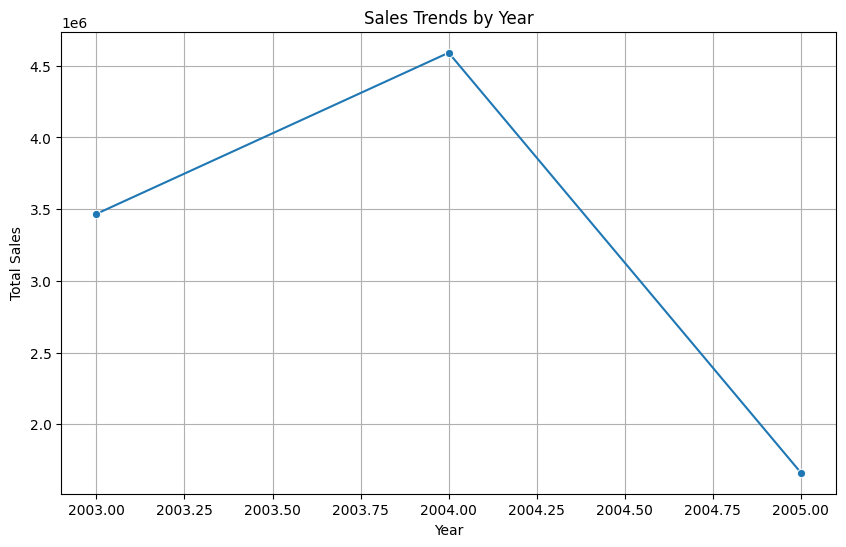

In [10]:
# Plot 1: Sales trends by year (Seaborn)
query_year = "SELECT YEAR_ID, SUM(SALES) AS Total_Sales FROM sales GROUP BY YEAR_ID ORDER BY YEAR_ID"
result_year = pd.read_sql_query(query_year, conn)
plt.figure(figsize=(10, 6))
sns.lineplot(data=result_year, x="YEAR_ID", y="Total_Sales", marker="o")
plt.title("Sales Trends by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Plot 2: Interactive top products (Plotly)
result_top_products = pd.read_sql_query("SELECT * FROM TopProducts", conn)
fig = px.bar(result_top_products, x="PRODUCTLINE", y="Total_Sales", title="Top 10 Products by Sales",
             hover_data=["Total_Sales"], color="PRODUCTLINE")
fig.update_layout(xaxis_title="Product Line", yaxis_title="Total Sales")
fig.show()

## 6. Basic Machine Learning Integration

### Description:
Train a simple model to predict sales based on QUANTITYORDERED and PRICEEACH.

### Azure Equivalent:
Use Azure Machine Learning for model training and deployment.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

try:
    X = df[["QUANTITYORDERED", "PRICEEACH"]]
    y = df["SALES"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    logger.info(f"Linear Regression MSE: {mse}")
    print(f"Model Coefficients: {model.coef_}")
    print(f"Mean Squared Error: {mse}")
except Exception as e:
    logger.error(f"Error in ML model training: {e}")
    raise

Model Coefficients: [95.30277332 57.87432888]
Mean Squared Error: 680744.7976350911


## 7. Proposal for Production Deployment

### Proposed Model:
Adopt a hybrid Azure Blob Storage + Azure SQL Database pipeline with Azure Data Factory (ADF) for ETL orchestration and Azure Machine Learning for predictive analytics. Integrate with Power BI for dashboards and Azure Monitor for logging.

### Why Best:
- **Scalability:** Azure Blob and SQL Hyperscale handle petabyte-scale data with auto-scaling.
- **Automation:** ADF automates ETL, reducing manual steps.
- **Analytics:** Advanced SQL and ML enable deep insights (e.g., predictive sales).
- **Security:** RBAC, encryption, and data masking ensure compliance.
- **Integration:** Seamless with Power BI, Azure ML, and Stream Analytics for real-time insights.

### Steps for Azure Deployment:
1. Provision Azure Blob Storage and SQL Database (use free tier for testing).
2. Set up ADF pipeline: Copy Data (Blob to SQL), Data Flow (cleaning), Stored Procedure (queries).
3. Train ML model in Azure ML, deploy as endpoint.
4. Enable Azure AD authentication and data encryption.
5. Monitor with Azure Monitor; optimize costs with Hot/Cool Blob tiers.

## 8. Cleanup

### Description:
Close connections and remove temporary files.

In [12]:
import os
try:
    conn.close()
    logger.info("Database connection closed")
    for file in [emulated_blob_path, "/content/customers.csv", database_path]:
        if os.path.exists(file):
            os.remove(file)
            logger.info(f"Removed file: {file}")
    print("Project complete. All resources cleaned up.")
except Exception as e:
    logger.error(f"Error during cleanup: {e}")
    raise

Project complete. All resources cleaned up.
